<center>Progetto realizzato da Elena Curti (matr. 185431)

# Cambiamenti climatici
</center>

## Introduzione
Secondo la definizione delle Nazioni Unite, con “cambiamento climatico” si intende qualsiasi alterazione dell’atmosfera globale che sia riconducibile all’azione umana in modo diretto o indiretto. 

<center><i>“<b>Climate change</b> means a change in climate which is attributed directly or indirectly to human activity that alters the composition <br> of the global atmosphere and which is in addition to natural climate variability observed over comparable periods of time.” </I> <br>
- United nations framework convention on climate change, 1992 </center>

### Cause
La principale causa dei cambiamenti climatici è la generazione di energia elettrica e calore bruciando combustibili fossili. Infatti, si stima che, la maggior parte dell’elettricità venga ancora generata bruciando carbone, petrolio o gas, che producono <b>anidride carbonica (CO2)</b> e ossido di azoto, dei potenti gas serra. <br> 
Altre cause dei cambiamenti climatici sono: produzione di beni di consumo (ad esempio nell’industria elettronica e tessile), disboscamento, utilizzo di automobili, camion, navi e aerei. 

### Effetti
Una delle conseguenze più evidente è <b>l'aumento delle temperature</b>. Aumentando la concentrazione di gas serra, infatti, aumenta anche la temperatura superficiale globale. Le temperature più alte favoriscono l’insorgenza di patologie da calore, rendono più difficile lavorare all’aperto, mentre gli incendi si verificano più facilmente e si propagano più rapidamente. <br>
Altro importante effetto è il <b>riscaldamento e innalzamento degli oceani</b>. Le acque oceaniche assorbono la maggior parte del calore derivante dal riscaldamento atmosferico globale. Il calore aumenta anche il volume delle acque con conseguente innalzamento dei livelli che, accompagnati dal progressivo scioglimento delle calotte glaciali, determinano una reale minaccia per le comunità costiere e insulari. <br>
Altre conseguenze sono: tempeste più violente, aumento della siccità, perdita di specie, mancanza di cibo, maggiori rischi per la salute, povertà e migrazioni. 

## Descrizione del progetto
Lo scopo del progetto proposto è di informare i lettori sull'importantissimo tema dei cambiamenti climatici, attraverso l'analisi di dati. Spiegherò inizialmente come recuperare e modificare opportunamente i dati. Mostrerò poi dei grafici per capire meglio come stanno aumentando le temperature e i livelli del mare negli ultimi anni. Analizzerò poi come sono correlati tra loro gli aumenti delle temperature, i livelli del mare e le emissioni di CO2. Infine, cercherò di dare una visione futura dei cambiamenti climatici. <br>

## Requisiti
Questo progetto è stato realizzato con Python 3.11. E' necessaria l'installazione dei seguenti pacchetti:

In [ ]:
%pip install pandas matplotlib seaborn scipy sklearn scikit-learn 

## 1. Raccolta di dati
I dati raccolti si trovano nella cartella [original](applicazione/data/original/). 

- I file contenenti i dati relativi alle temperature ([temperatures.dat](applicazione/data/original/temperatures.dat)) e alle stazioni geografiche che le hanno registrate  ([stations.inv](applicazione/data/original/stations.inv))  sono stati trovati sul sito [National Centers for Environmental Information](https://www.ncei.noaa.gov/). Sono scaricabili al seguente link: https://www.ncei.noaa.gov/pub/data/ghcn/v4/ghcnm.tavg.latest.qcf.tar.gz <br>

- I file contenenti informazioni sui Paesi sono stati trovati su due repository di github: 
    - [fips_to_iso_country_codes.csv](applicazione/data/original/fips_to_iso_country_codes.csv) trovato al seguente link: https://github.com/mysociety/gaze/blob/master/data/fips-10-4-to-iso-country-codes.csv
    - [countries_info.csv](applicazione/data/original/countries_info.csv) trovato al seguente link https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv <br><br>

- Il file contenente informazioni sui livelli del mare ([sea_levels.csv](applicazione/data/original/sea_levels.csv)) è stato trovato su Kaggle al seguente link https://www.kaggle.com/datasets/kkhandekar/global-sea-level-1993-2021<br>

- Il file contenente informazioni sui livelli di CO2 ([co2_levels.csv](applicazione/data/original/co2_levels.csv)) è stato trovato su Kaggle al link https://www.kaggle.com/datasets/programmerrdai/co2-levels-globally-from-fossil-fuels

## 2. Elaborazione dei dati

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import calendar
import numpy as np
from sklearn import linear_model

pd.options.display.max_rows = None
pd.options.display.max_columns = None

DATA_FOLDER = "data" + os.path.sep
DATA_ORIGINAL_FOLDER = DATA_FOLDER + "original"+ os.path.sep
DATA_MODIFIED_FOLDER = DATA_FOLDER + "modified"+ os.path.sep

### Stazioni e temperature
I file [stations.inv](applicazione/data/original/stations.inv) e [temperatures.dat](applicazione/data/original/temperatures.dat) trovati su internet sono Fixed Width Text File. Ho deciso di modificarli e convertirli in file CSV ([stations_created.csv](applicazione/data/modified/stations_created.csv), [tempetatures_created.csv](applicazione/data/modified/tempetatures_created.csv)). In questo modo creo due file con i dati puliti e pronti per essere letti in futuro. 

#### Stazioni
Il file creato [stations_created.csv](applicazione/data/modified/stations_created.csv) ha la seguente struttura:

|Campo| Significato|
|:-|:-|
|station_id| Codice identificativo della stazione. I primi due caratteri sono il codice FIPS del Paese|
|latitude| Latitudine della stazione in gradi decimali|
|longitude| Longitudine della stazione in gradi decimali|
|station_elev| Altitudine della stazione in metri |
|station_name| Nome della stazione|
|fips| Codice FIPS del Paese|

Rispetto al file trovato su internet:
- Ho aggiunto il campo "fips" selezionando i primi due caratteri di station_id. In questo modo semplifico in futuro il merge con le informazioni sui Paesi. 
- Ho sostituito il valore 9999 col valore "nullo" di Pandas nella colonna "station_elev", perchè esso rappresenta un dato mancante. 

In [3]:
# File con le stazioni
FILE_ORIGINALE_STATIONS = DATA_ORIGINAL_FOLDER + "stations.inv"
FILE_CSV_STATIONS = DATA_MODIFIED_FOLDER + "stations_created.csv"
HEADERS_STATIONS = ["station_id","latitude","longitude","station_elev","station_name"]

if not os.path.exists(FILE_CSV_STATIONS):
    print("Creo file csv partendo da",FILE_ORIGINALE_STATIONS,"...")
    
    # Leggo il file
    df = pd.read_fwf(FILE_ORIGINALE_STATIONS,widths=[11,9,10,7,31], header=None, names=HEADERS_STATIONS)
    
    # Aggiungo il campo fips
    df['fips'] = df["station_id"].apply(lambda x : x[0:2])
    HEADERS_STATIONS += ["fips"]
    
    # Trasformo i valori -999.0 di station_elev in NaN
    df["station_elev"] = df["station_elev"].apply(lambda x: pd.NA if x == 9999 else x)

    # Converto in formato CSV
    df.to_csv(FILE_CSV_STATIONS, index=False)

# Leggo il nuovo file
df_stations = pd.read_csv(FILE_CSV_STATIONS)

print("File letto correttamente! Ecco 3 record di esempio: ")
df_stations.sample(3)

File letto correttamente! Ecco 3 record di esempio: 


,station_id,latitude,longitude,station_elev,station_name,fips
10564,MYM00048615,6.1670,102.2930,4.9,SULTAN_ISMAIL_PETRA,MY
19283,USC00258133,41.4581,-100.5986,911.4,STAPLETON_5W,US
18674,USC00233799,37.9500,-93.3167,249.9,HERMITAGE,US


#### Temperature
Il file creato [tempetatures_created.csv](applicazione/data/modified/stations_created.csv) ha la seguente struttura:

|Campo| Significato|
|:-|:-|
|station_id| Codice identificativo della stazione. I primi due caratteri sono il codice FIPS del Paese|
|year| Anno in cui sono state misurate le temperature|
|month_value| Valore della temperatura del mese "month" (in gradi Celsius) |
|temp_media| Temperatura media della stazione nell'anno year (in gradi Celsius) |

Rispetto al file trovato su internet:
- Ho eliminato alcune colonne non necessarie
- Ho convertito i valori di month_value in float. 
- Ho eliminato i record con valori mancanti
- Ho aggiunto il campo temp_media

In [4]:
# File con le temperature
FILE_ORIGINALE_TEMPERATURES = DATA_ORIGINAL_FOLDER + "temperatures.dat"
FILE_CSV_TEMPERATURES = DATA_MODIFIED_FOLDER + "temperatures_created.csv"

# Creo due liste: una con le lunghezze dei campi e una con i nomi delle colonne
list_width= [11,4,4] + [j for i in [[5,1,1,1] for _ in range(12)] for j in i] 
HEADERS_TEMPERATURES = ["station_id", "year", "DEL_ME"]
for i in range(1,13):
    month_name = calendar.month_name[i]
    HEADERS_TEMPERATURES += [month_name+"_value","DEL_ME"+str(i)+"a","DEL_ME"+str(i)+"d","DEL_ME"+str(i)+"b"]

if not os.path.exists(FILE_CSV_TEMPERATURES):
    print("Creo file csv partendo da",FILE_ORIGINALE_TEMPERATURES,"...")
    
    # Leggo il file
    df = pd.read_fwf(FILE_ORIGINALE_TEMPERATURES, widths=list_width,header=None, names=HEADERS_TEMPERATURES)
    

    # Cambio i valori -9999 di month_value con NaN. Trasformo anche i valori validi in decimale. 
    for i in range(1,13):
        month_name = calendar.month_name[i]
        df[month_name+"_value"] = df[month_name+"_value"].apply(lambda x: pd.NA if str(x) == "-9999" else x/100)

    # Calcolo la temperatura media
    df["temp_media"] = df[[calendar.month_name[i]+"_value" for i in range(1,13)]].mean(axis=1)    
    df["temp_media"] = df["temp_media"].apply(lambda x: round(x, 2))    

    # Elimino le colonne non necessarie
    HEADERS_TEMPERATURES = [i for i in HEADERS_TEMPERATURES if not i.__contains__("DEL_ME")]
    HEADERS_TEMPERATURES.insert(2, "temp_media")
    df = df[HEADERS_TEMPERATURES]

    # Rimuovo i record con valori nulli
    df = df.dropna()

    # Converto in formato CSV
    df.to_csv(FILE_CSV_TEMPERATURES, index=False)

# Leggo il nuovo file
df_temperatures = pd.read_csv(FILE_CSV_TEMPERATURES)

print("File letto correttamente! Ecco 3 record di esempio: ")
df_temperatures.sample(3)

File letto correttamente! Ecco 3 record di esempio: 


,station_id,year,temp_media,January_value,February_value,March_value,April_value,May_value,June_value,July_value,August_value,September_value,October_value,November_value,December_value
134488,CA004064600,2002,1.13,-15.67,-8.25,-13.40,-2.54,8.23,16.09,18.58,15.46,9.58,-0.67,-4.51,-9.34
20034,ASN00010916,2016,15.21,22.37,22.06,20.26,16.45,12.70,10.53,9.26,9.35,9.61,12.96,17.82,19.17
245377,FIE00145502,2020,4.56,-3.01,-4.55,-2.82,-0.01,6.32,16.62,15.00,14.43,9.85,5.21,1.01,-3.33


### Paesi
Per quanto riguarda le informazioni sui paesi, ho unito le informazioni dei due file [country_info.csv](applicazione/data/original/countries_info.csv) e [fips_to_iso_country_codes.csv](applicazione/data/original/fips_to_iso_country_codes.csv), ottenendo quindi un DataFrame unico con la seguente  struttura:

|Campo|Significato|
|:-|:-|
|fips| Codice FIPS del paese|
|name_country| Nome del Paese|
|region| Continente di appartenenza|
|sub-region| Altre informazioni sulla zona di appartenenza|

In [5]:
# File dei paesi
FILE_ORIGINALE_FIPS_TO_ISO = DATA_ORIGINAL_FOLDER + "fips_to_iso_country_codes.csv"
FILE_ORIGINALE_COUNTRY_INFO = DATA_ORIGINAL_FOLDER + "countries_info.csv"

# Leggo i files originali
df_fips_tmp = pd.read_csv(FILE_ORIGINALE_FIPS_TO_ISO)
df_country = pd.read_csv(FILE_ORIGINALE_COUNTRY_INFO)

# Faccio il join sul codice alpha-2
df_country = pd.merge(df_fips_tmp, df_country, how='left',left_on='ISO 3166', right_on='alpha-2')

# Elimino le colonne non necessarie e rinomino le altre
df_country = df_country.drop(['ISO 3166','iso_3166-2', 'alpha-3', 'alpha-2', 'country-code', 'intermediate-region', 'intermediate-region-code', 'region-code', 'sub-region-code'], axis=1)
df_country['name_country'] = df_country.apply(lambda x : str(x['Name'] if pd.isna(x["name"]) else x['name']), axis=1)
df_country = df_country.drop([ 'name', 'Name'], axis=1)
df_country = df_country.rename(columns={"FIPS 10-4":"fips"})

print("Files letti correttamente! Ecco 3 record di esempio: ")
df_country.sample(3)

Files letti correttamente! Ecco 3 record di esempio: 


,fips,region,sub-region,name_country
248,TS,Africa,Northern Africa,Tunisia
115,IR,Asia,Southern Asia,Iran (Islamic Republic of)
13,AT,Oceania,Australia and New Zealand,Australia


### Livelli del mare
Dal file [sea_levels.csv](applicazione/data/original/sea_levels.csv), contenente i livelli del mare negli ultimi anni, ho ricavato un Dataframe con la seguente struttura: 

|Campo| Significato|
|:-|:-|
|year| anno (impostato come indice)|
|gmsl_variation| Variazione del livello del mare (Global Mean Sea Level) in mm |

Inoltre, nel file originale c'erano più record per anno,ma ho deciso di mantenerne solo uno per ogni anno, che ne rappresenti la variazione media. 

In [6]:
# Elaborazione del file sea_levels.csv
df_sea = pd.read_csv(DATA_ORIGINAL_FOLDER + "sea_levels.csv")
df_sea = df_sea[["Year", "GMSL_noGIA"]]
df_sea = df_sea.rename(columns={"Year":"year", "GMSL_noGIA": "gmsl_variation"})
df_sea = df_sea.groupby("year").mean()

print("File letto correttamente! Ecco 3 record di esempio: ")
df_sea.sample(3).sort_values(by="year")

File letto correttamente! Ecco 3 record di esempio: 


,gmsl_variation
year,
1994,-30.951081
2009,8.411351
2018,42.405135


#### Livelli di C02
Infine, ho letto i dati dal file [co2_levels.csv](applicazione/data/original/co2_levels.csv) e ne ho selezionato il solo campo "Total" (cambiato poi in "co2_level"). 

|Campo| Significato|
|:-|:-|
|year| anno (impostato come indice)|
|co2_level| Emissioni totali di carbonio derivanti dal consumo di combustibili fossili e dalla produzione di cemento (in milioni di tonnellate di CO2)|


In [7]:
# Elaborazione del file co2_levels.csv
df_co2 = pd.read_csv(DATA_ORIGINAL_FOLDER + "co2_levels.csv")
df_co2 = df_co2[["Year", "Total"]]
df_co2 = df_co2.rename(columns={"Year":"year", "Total": "co2_level"})
df_co2 = df_co2.set_index("year")

print("File letto correttamente! Ecco 3 record di esempio: ")
df_co2.sample(3).sort_values(by="year")

File letto correttamente! Ecco 3 record di esempio: 


,co2_level
year,
1856,76
1882,256
1954,1865


## 3. Visualizzazione dei dati

Una volta letti tutti i file CSV, si può effettuare il merge tra i DataFrame con temperature, stazioni e paesi usando il seguente codice:

In [8]:
df = df_temperatures.merge(df_stations).merge(df_country)
df.sample(4)

,station_id,year,temp_media,January_value,February_value,March_value,April_value,May_value,June_value,July_value,August_value,September_value,October_value,November_value,December_value,latitude,longitude,station_elev,station_name,fips,region,sub-region,name_country
1009527,USW00013893,1885,15.83,1.80,3.90,9.10,17.80,19.60,26.60,28.20,26.70,23.20,15.40,11.40,6.20,35.0564,-89.9864,77.4,MEMPHIS_INTL_AP,US,Americas,Northern America,United States of America
526255,SWE00115881,1973,6.90,-0.15,0.83,3.99,4.12,10.35,15.20,17.93,15.52,11.15,4.58,0.19,-0.94,58.4356,12.7075,54.0,SATENAS,SW,Europe,Northern Europe,Sweden
452799,RSM00022939,1969,0.53,-19.45,-16.29,-9.88,1.98,6.09,12.26,15.66,15.21,8.82,2.84,-0.62,-10.22,60.0330,37.7830,131.0,BELOZERSK,RS,Europe,Eastern Europe,Russian Federation
432609,PLXLT474484,1936,8.98,3.00,-0.80,5.50,7.70,14.60,17.40,19.40,16.50,13.20,6.20,3.50,1.60,51.1000,17.0000,119.0,WROCLAW,PL,Europe,Eastern Europe,Poland


### Informazioni e statistiche sui dati

#### Temperature

In [9]:
# Stampo le statistiche 
df_describe = df_temperatures.describe(include='all')

# Sistemo l'output
function_sistema_output = lambda x : x if type(x) == str else ('{:.0f}'.format(x) if pd.isna(x) or int(x) == x else  '{:.2f}'.format(x))
df_describe = df_describe.applymap(function_sistema_output)

display(df_describe)

,station_id,year,temp_media,January_value,February_value,March_value,April_value,May_value,June_value,July_value,August_value,September_value,October_value,November_value,December_value
count,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549,1077549
unique,27769,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,NLM00006260,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,nan,1969.71,11.10,1.17,2.47,6.16,10.70,14.97,18.56,20.68,20.12,16.93,12.15,6.75,2.60
std,nan,36.30,7.79,12.83,12.39,10.61,8.39,6.86,6.31,6.17,6.13,6.49,7.72,9.94,11.89
min,nan,1702,-57.90,-61.03,-61,-62.10,-68.60,-70.30,-72.83,-73.80,-75,-71.05,-70.50,-77,-72.79
25%,nan,1950,6.29,-6.51,-5.30,-0.52,5.53,10.84,14.57,17.02,16.29,12.71,7.42,1.04,-4.38
50%,nan,1975,10.26,-0.13,1.26,5.10,9.81,14.40,18.38,21.05,20.29,16.49,11.37,5.55,1.21
75%,nan,1998,16.13,7.80,9.35,12.46,15.72,19.02,22.91,25.17,24.60,21.48,16.95,12.54,8.78


Si può quindi vedere che ci sono in totale 27˙769 stazioni che hanno registrato le temperature. Il primo anno in cui è stata misurata la temperatura è il 1702 e l'ultimo il 2021. 

#### Livello del mare

In [10]:
df_tmp = df_sea.copy()
df_tmp["year"] = df_tmp.index
df_describe = df_tmp.describe(include="all")
df_describe.applymap(function_sistema_output)

,gmsl_variation,year
count,29,29
mean,5.46,2007
std,26.81,8.51
min,-34.61,1993
25%,-18.43,2000
50%,1.49,2007
75%,24.85,2014
max,50.03,2021


In totale ci sono 29 record che vanno dal 1993 al 2021. La minima variazione è di -34.61 mm, mentre la massima è di 50.03 mm. 

#### Livelli di CO2

In [11]:
df_tmp = df_co2.copy()
df_tmp["year"] = df_tmp.index
df_describe = df_tmp.describe(include="all")
df_describe.applymap(function_sistema_output)

,co2_level,year
count,260,260
mean,1402.79,1880.50
std,2253.10,75.20
min,3,1751
25%,12.75,1815.75
50%,239.50,1880.50
75%,1385,1945.25
max,9167,2010


In questo file, infine, ci sono 260 record che vanno dal 1751 al 2010. La minima emissione è di 3 milioni di tonnellate, mentre la massima è di 9˙167 milioni di tonnellate.

### Come è cambiata la situazione climatica dal 1980 ad oggi?
Per mostrare la gravità della situazione climatica, presenterò due grafici che indicano di quanti gradi è aumentata la temperatura dal 1980 al 2000 e dal 1980 al 2020, in ogni stazione meteorologica. <br>
Per costruire il primo grafico, salvo le temperature registrate nel 1980 e nel 2000. Unisco i dati sull'id della stazione. Calcolo poi, per ogni stazione, la differenza tra le temperature memorizzate nel 2000 e nel 1980. Vado infine a disegnare il grafico mettendo un "puntino" colorato per ogni stazione e una cartina geografica come sfondo. I "puntini" gialli, arancioni e rossi indicano un aumento della temperatura. <br>
Ho ripetuto lo stesso procedimento per il secondo grafico, cambiando gli anni.

Nel grafico a sinistra si può osservare di quanti gradi (°C) è aumentata la temperatura tra il 1980 e il 2000.
In quello a destra tra il 1980 e il 2020.


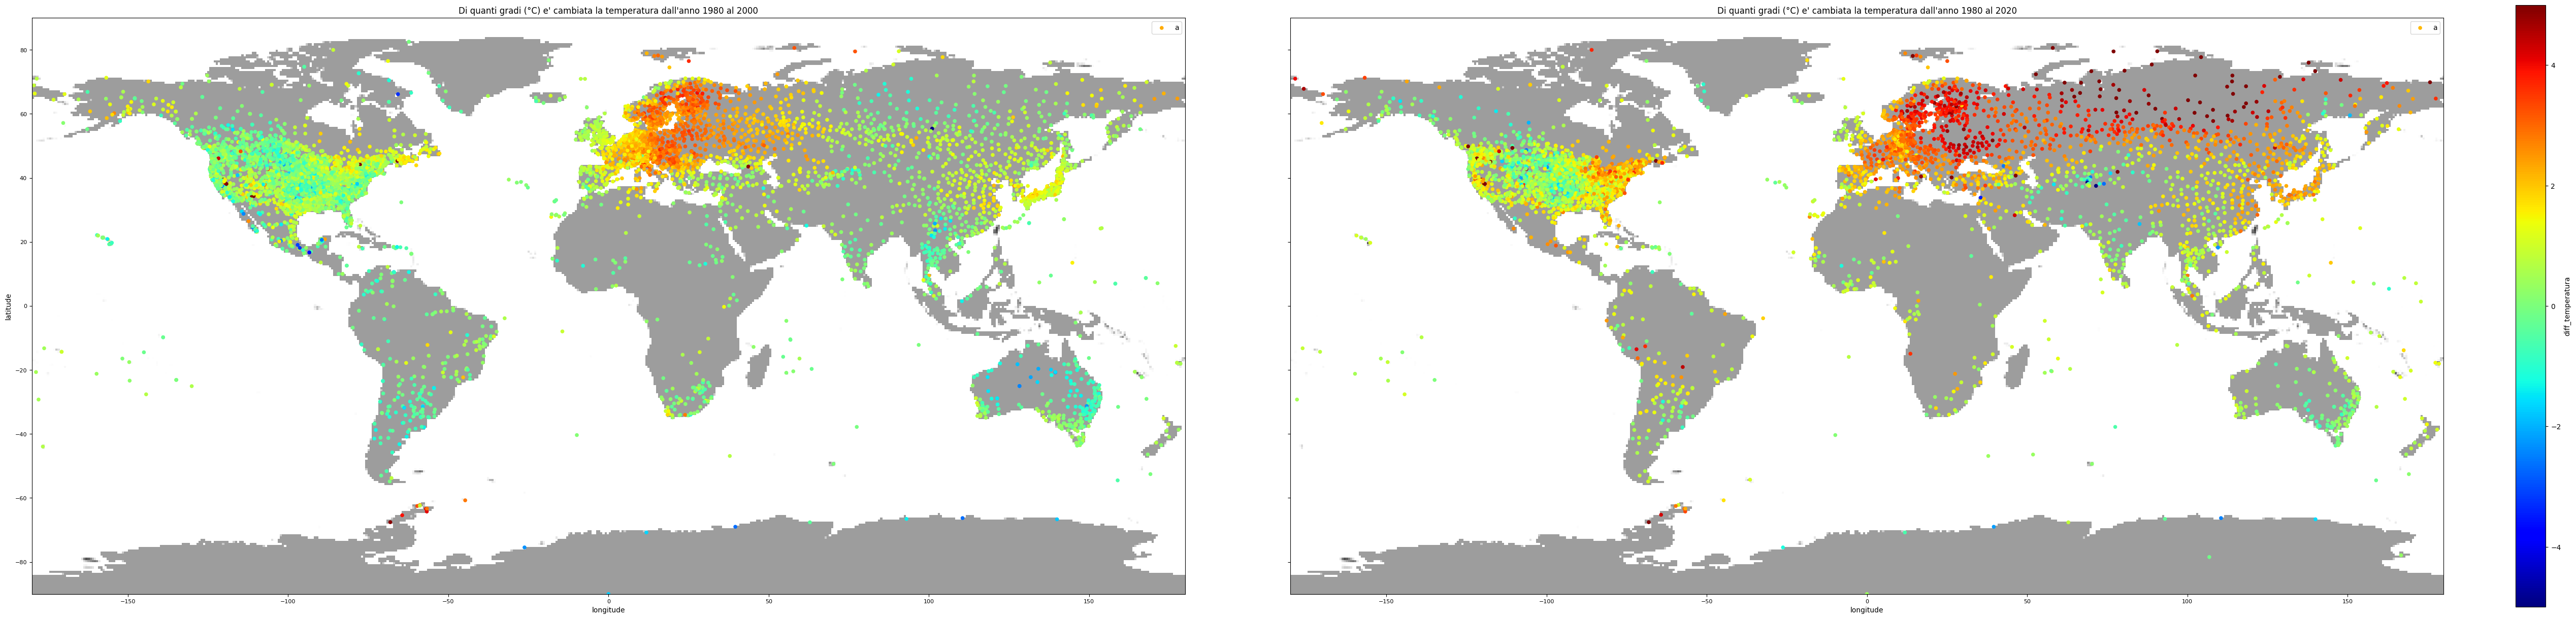

In [12]:
MIN_MAX_LONGITUDE = (-180,180)
MIN_MAX_LATITUDE = (-90,90)

def plot_map_difference_temperatures(list_years):
    """ Funzione che disegna i grafici con le differenze di temperature degli anni dati in input."""
    def plot_map_two_years(year1, year2, i):
        def get_col_name(year):
            return 'temperatura_year_'+str(year)
        
        def get_df_temperatures_in_year(anno):
            df_to_plot = df_temperatures[(df_temperatures["year"] == anno)]    # Seleziono solo l'anno desiderato
            df_to_plot = df_to_plot.merge(df_stations, on="station_id")        # Faccio il merge con le stazioni
            df_to_plot = df_to_plot.rename(columns={"temp_media":get_col_name(anno) }) # Rinomino la colonna 
            df_to_plot = df_to_plot[["station_id", "year","latitude", "longitude", get_col_name(anno)]] # Seleziono solo alcuni campi
            return df_to_plot   
    
        # Faccio il merge dei due dataframe dei due anni in input, in base alla station_id
        df = get_df_temperatures_in_year(year1).merge(get_df_temperatures_in_year(year2), how="inner",  on=["station_id", "latitude", "longitude"])

        # Calcolo la differenza della temperatura media annuale
        df['diff_temperatura'] = df[get_col_name(year2)] - df[get_col_name(year1)]
        
        # Disegno il grafico
        titolo = "Di quanti gradi (°C) e' cambiata la temperatura dall'anno "+str(year1)+" al " + str(year2)
        grafico = df.plot(x="longitude", y="latitude", label="a",c="diff_temperatura",fontsize=8,xlim=MIN_MAX_LONGITUDE, ylim=MIN_MAX_LATITUDE,  \
            clim=(-5,5),kind="scatter", colormap="jet", title=titolo, ax=axes[i], figsize=(54,27))
        
        # Metto la cartina geografica in background
        img = plt.imread("imgs" + os.path.sep + "world.png")
        grafico.imshow(img, extent=[MIN_MAX_LONGITUDE[0], MIN_MAX_LONGITUDE[1], MIN_MAX_LATITUDE[0], MIN_MAX_LATITUDE[1]])

    # Creo i subplots e chiamo la funzione che disegni i grafici
    fig, axes = plt.subplots(nrows=1,ncols=len(list_years)-1, sharey=True, figsize=(2,2))
    i=0
    for anno2 in list_years[1:]:
        plot_map_two_years(list_years[0], anno2, i)
        i += 1
    
    # Abbellimenti del grafico: lascio solo l'ultima colorbar, tolgo lo spazio tra i grafici, setto l'altezza finale
    j = 0
    for i in  plt.gcf().get_axes():
        if i._label == "<colorbar>":
            if j != len(list_years)-2:
                i.remove()
            j += 1
    fig.tight_layout()
    fig.set_figheight(12)
    plt.show()

# Disegno le mappe
print("Nel grafico a sinistra si può osservare di quanti gradi (°C) è aumentata la temperatura tra il 1980 e il 2000.\nIn quello a destra tra il 1980 e il 2020.")
plot_map_difference_temperatures([1980,2000,2020])

Si può quindi notare che la temperatura è in notevole rialzo, soprattutto in Europa. <br> 
Sembrerebbero non esserci molti dati in Africa, Australia e Sudamerica, andiamo quindi a capire quante stazioni ci sono in ogni area geografica.

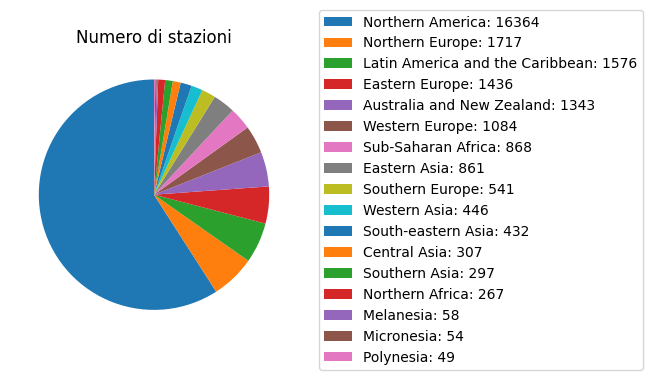

In [13]:
# Recupero i valori 
df_stations_per_continent = df_stations.merge(df_country, on="fips")
df_stations_per_continent = df_stations_per_continent.groupby("sub-region").count()["station_id"]
df_stations_per_continent = df_stations_per_continent.sort_values(ascending=False)

# Disegno il grafico a torta
pie = plt.pie(df_stations_per_continent.values, startangle=90)
plt.title("Numero di stazioni")

# Stampo la legenda
labels = [region + ": "+str(n_stazioni)  for region, n_stazioni in df_stations_per_continent.items()]
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="right", fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)

Nei precedenti grafici, quindi, non sono mostrati dati in alcune regioni perché in esse non sono presenti molte stazioni.

### In quali anni e in quali stazioni è stata registrata la maggiore differenza di temperatura?
Andiamo ora a capire in quali stazioni e in quali anni è stata registrata la maggiore differenza di temperatura. <br>
Per costruire il grafico, seleziono per ogni stazione, il primo e l'ultimo anno in cui sono state registrate le temperature. Calcolo la differenza tra le due temperature medie dei due anni. Seleziono i primi N (4) record con la differenza maggiore. Per ogni record selezionato, stampo un grafico con due linee che rappresentano le temperature dei due anni.

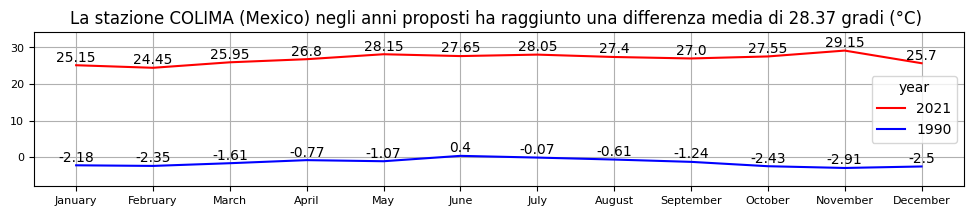

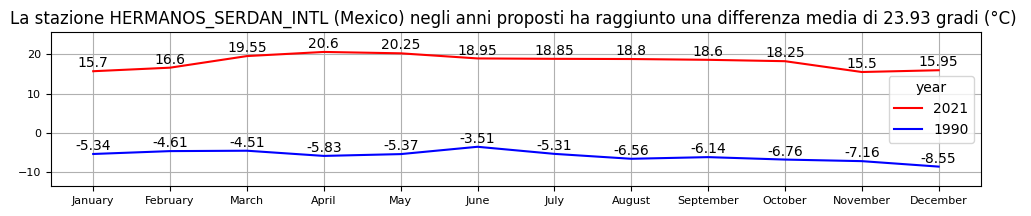

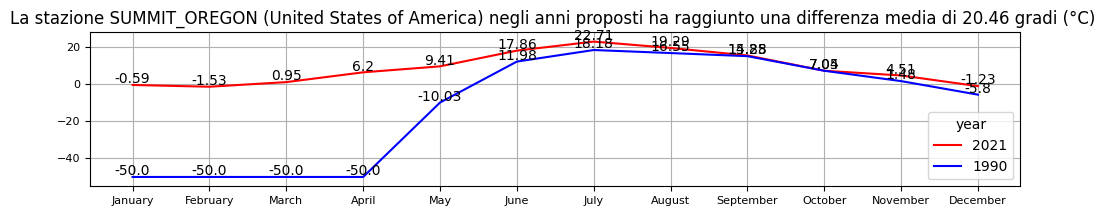

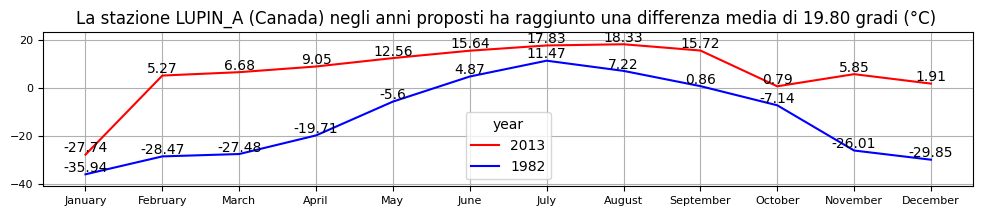

In [14]:
# Numero di grafici da mostrare
N = 4

# Per ogni stazione, seleziono due record: quello con l'anno minimo e quello con l'anno massimo
df = df_temperatures[["station_id", "year", "temp_media"]]
df_min = df.sort_values("year").groupby("station_id", as_index=False).first()
df_max = df.sort_values("year", ascending=False).groupby("station_id", as_index=False).first()
df = pd.concat([df_min, df_max]).sort_values(by=["station_id", "year"])

# Per ogni record, calcolo la differenza di temperatura media tra l'anno massimo e quello minimo
df["diff"] = df.groupby(['station_id'])['temp_media'].diff()

# Ordino i record in base alla differenza (decrescente) appena calcolata. Seleziono solo i primi N record
df_first_n_record = df.sort_values(by="diff", ascending=False).head(N)

# In df_first_n_record saranno presenti solo i record con gli anni massimi. Aggiungo quelli con gli anni minimi
df_tmp = df_first_n_record
for _, record in df_first_n_record.iterrows():
    record2 = df[(df["station_id"] == record["station_id"]) & (pd.isna(df["diff"]))]
    df_tmp = pd.concat([df_tmp, record2])

# Faccio il merge con i dati delle stazioni e dei paesi
df = df_tmp.merge(df_stations, on="station_id").merge(df_country, on="fips").merge(df_temperatures, on=["station_id", "year"])

# Per ogni stazione, stampo un grafico
for _, record in df_first_n_record.iterrows():
    # Seleziono i due record della stazione
    df_station_to_plot = df[df["station_id"] == record["station_id"]]

    nome_stazione = df_station_to_plot.iloc[1]["station_name"] 
    nome_country = df_station_to_plot.iloc[1]["name_country"] 
    titolo = "La stazione "+ nome_stazione  +" ("+ nome_country  \
        + ") negli anni proposti ha raggiunto una differenza media di " + f"{df_station_to_plot['diff'].max():.2f}" + " gradi (°C) "

    # Imposto l'anno come indice. Tengo solo le colonne con le temperature. Cambio i nomi alle colonne
    df_station_to_plot = df_station_to_plot.set_index(["year"])
    df_station_to_plot = df_station_to_plot[[calendar.month_name[i]+"_value" for i in range(1,13)]]                         
    df_station_to_plot = df_station_to_plot.rename(columns={calendar.month_name[i]+"_value":calendar.month_name[i] for i in range(1,13)})

    # Disegno il grafico
    y_min = df_station_to_plot.min().min()
    y_max = df_station_to_plot.max().max()
    df_station_to_plot.transpose().plot(figsize=(12,2), fontsize=8, title=titolo, color=['red', 'blue'], ylim=(y_min-5, y_max+5), xticks=[i for i in range(12)])
    plt.grid(True)
    for i in range(1,13):
        # if i % 2 == 1:
            for _, temp in df_station_to_plot.iterrows():
                plt.text(i-1, temp[calendar.month_name[i]]+1, temp[calendar.month_name[i]], ha='center' )


Le stazioni in cui è stata registrata una differenza di temperatura maggiore sono in Messico, Stati Uniti e in Canada.

### Di quanto è cambiata la temperatura media globale?
Ora andiamo a mostrare com'è cambiata la temperatura media globale negli anni.

Dal 1702 al 2021 la temperatura media globale si è alzata di 4.76°C. Per una media di 0.0024°C all'anno.


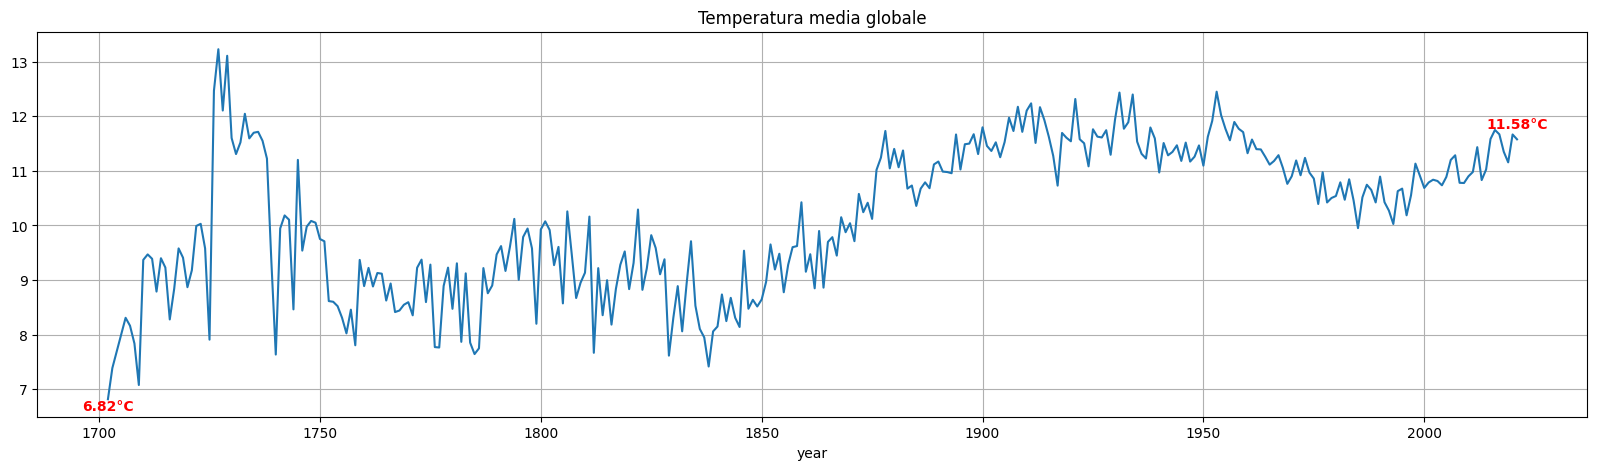

In [15]:
def get_min_max_years_values(df_or_serie):
    """ Funzione che ritorna una lista con: l'anno minimo, il relativo valore associato, 
    l'anno massimo ed il relativo valore associato della series o dataframe in input. """
    if type(df_or_serie) == pd.DataFrame:
        df_or_serie = df_or_serie.squeeze()

    min_year = df_or_serie.index.min()
    min_value = df_or_serie[df_or_serie.index == min_year].values[0]
    min_value = round(min_value, 2) 

    max_year = df_or_serie.index.max()
    max_value = df_or_serie[df_or_serie.index == max_year].values[0]
    max_value = round(max_value, 2) 
    
    return [min_year, min_value, max_year, max_value]
    # min_year, min_value, max_year, max_value = get_min_max_years_values_in_df(df)

def print_tag_in_grafico(x, y, text):
    """Funzione che stampa un'etichetta sul grafico in posizione (x,y) con il testo dato."""
    plt.text(x, y,text, fontweight="bold", fontsize="medium", color='red', ha="center")

# Seleziono i dati e disegno il grafico
series_temp = df_temperatures[["year", "temp_media"]].groupby("year")["temp_media"].mean()
series_temp.plot(kind="line", figsize=(20,5), title="Temperatura media globale")
plt.grid()

# Aggiungo le etichette con i valori negli anni minimo e massimo
min_year, min_value, max_year, max_value = get_min_max_years_values(series_temp)
print_tag_in_grafico(min_year, min_value-0.2, str(min_value)+ "°C")
print_tag_in_grafico(max_year, max_value+0.2, str(max_value)+ "°C")

# Stampo alcuni dati
differenza_totale = max_value-min_value
media = differenza_totale / (max_year-min_value)
print("Dal",min_year ,"al", max_year, "la temperatura media globale si è alzata di", f"{differenza_totale:.2f}","\b°C. Per una media di", f"{media:.4f}", "\b°C all'anno.")

Questo grafico mostra un innalzamento delle temperature medie globali. Dobbiamo però considerare che la prima temperatura registrata è del 1702. In quell'anno probabilmente non sono state registrate temperature in tutto il mondo, ma solo in poche stazioni. Quindi, per mostrare un grafico più veritiero, cerchiamo di restringere il range degli anni. Per fare ciò, andiamo inizialmente a vedere quante temperature sono state registrate per ogni anno. Per avere un grafico più leggero da visualizzare, andrò a raggruppare i record per decennio, invece che per anno. 

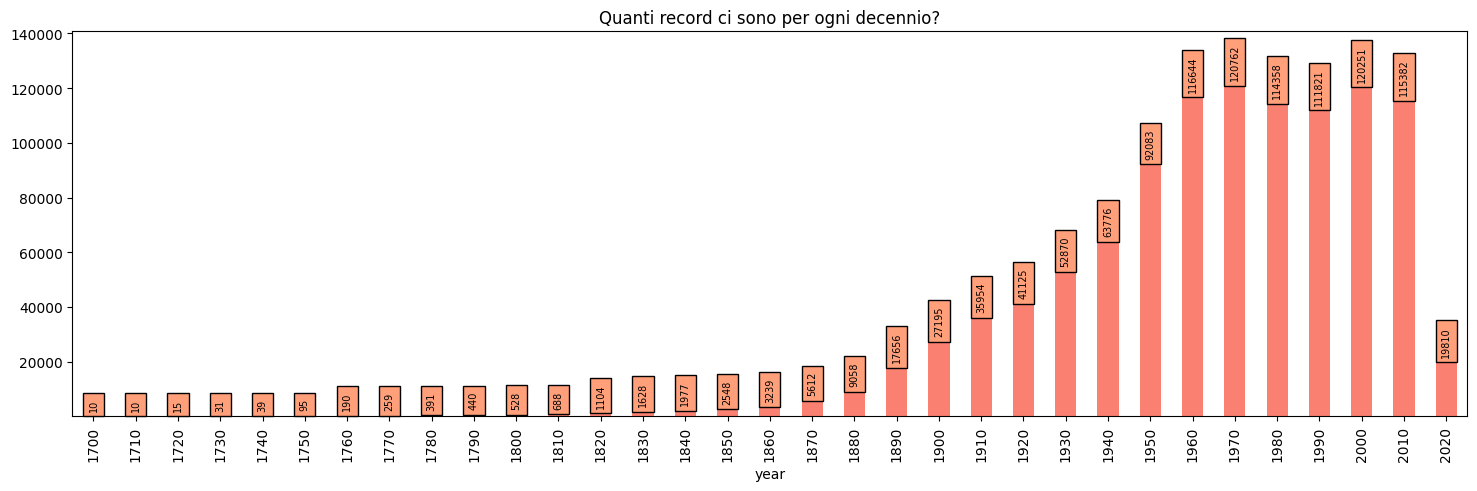

In [16]:
# Raggruppo i dati per anno e poi per decennio
df_record_per_year = df_temperatures.groupby("year").count()["station_id"].sort_values().transpose()
df_record_per_year = df_record_per_year.groupby((df_record_per_year.index//10)*10).sum()

# Disegno il grafico 
tmp = df_record_per_year.plot(kind="bar", figsize=(18,5), title="Quanti record ci sono per ogni decennio?", \
    color="salmon", ylim=(df_record_per_year.values.min(), 20000+df_record_per_year.values.max()))
y_val = df_record_per_year.values
for i in range(len(y_val)):
    plt.text(i, y_val[i]+2800, y_val[i], ha = 'center', bbox = dict(facecolor = 'lightsalmon', alpha=1),rotation="vertical", fontsize="x-small")


Scegliamo ora un anno in cui è stata registrata una quantità adeguata di temperature (ad esempio il 1980) e andiamo a ridisegnare l'andamento della temperatura media globale da allora. 

Dal 1980 al 2021 la temperatura media globale si è alzata di 1.04°C. Per una media di 0.03°C all'anno.


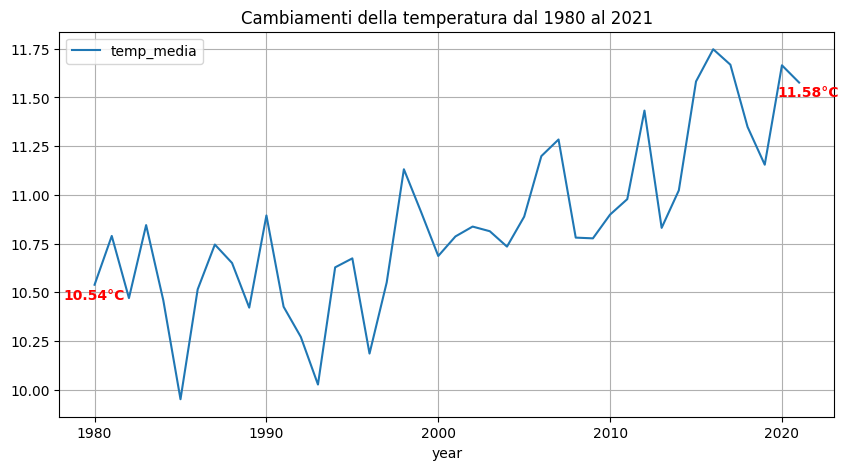

In [17]:
MIN_YEAR = 1980

# df_temp_media = df_temperatures.merge(df_stations).merge(df_country)
def get_df_temp_media_globale_per_anno(min_year=MIN_YEAR):
    """Questa funzione ritorna un DataFrame con
        - indice su 'year'
        - un campo 'temp_media' contenente la temperatura media globale registrata nel relativo anno. 
    """
    df_temp_media = df_temperatures[["station_id", "year", "temp_media"]]
    df_temp_media = df_temp_media[(df_temp_media["year"] >= min_year) ]
    df_temp_media = df_temp_media.groupby("year").mean(numeric_only=True)
    return df_temp_media

# Calcolo la temperatura media globale. Ne memorizzo i valori nell'anno massimo e minimo 
df_temp_media = get_df_temp_media_globale_per_anno()
min_year, min_value, max_year, max_value = get_min_max_years_values(df_temp_media)

# Disegno il grafico
df_temp_media.plot(figsize=(10,5), title="Cambiamenti della temperatura dal " + str(MIN_YEAR) + " al " + str(max_year))
plt.grid()
print_tag_in_grafico(MIN_YEAR, min_value-0.075, f"{min_value:.2f}°C")
print_tag_in_grafico(max_year+0.5, max_value-0.075, f"{max_value:.2f}°C")

# Stampo la differenza di temperatura totale e media
df_temp_media = df_temp_media.iloc[[0, -1]]
differenza_totale = df_temp_media.diff().dropna()['temp_media'].item()
media = differenza_totale / (max_year-MIN_YEAR)
print("Dal",MIN_YEAR ,"al", max_year, "la temperatura media globale si è alzata di", f"{differenza_totale:.2f}","\b°C. Per una media di", f"{media:.2f}", "\b°C all'anno.")

In questi ulitimi 41 anni, la temperatura media globale è quindi salita di circa 1°C. Anche se può sembrare poco, questo aumento della temperatura, se non fermato per tempo, porebbe portare a gravi conseguenze ambientali.

### I livelli dei mari si stanno alzando?
Dopo aver mostrato l'aumento della temperatura, passiamo ora ad un altro effetto dei cambiamenti climatici: l'innalzamento dei livelli del mare. Mostrerò quindi un grafico che indica di quanti mm si è alzato il livello del mare negli anni.

Dal 1993 al 2021 i livelli del mare si sono alzati di 84.64 mm. Per una media di 3.02 mm all'anno.


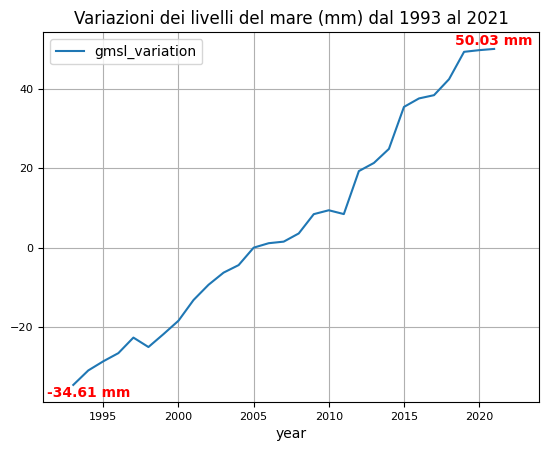

In [18]:
# Salvo le variazioni del primo e dell'ultimo anno
df_sea_to_print = df_sea.iloc[[0, -1]]
min_year, min_value, max_year, max_value = get_min_max_years_values(df_sea_to_print)

# Disegno il grafico
titolo = "Variazioni dei livelli del mare (mm) dal "+ str(min_year) + " al " + str(max_year)
df_sea.plot(fontsize=8, title=titolo, xlim=(min_year-2, max_year+3))
plt.grid(True)
print_tag_in_grafico(min_year+1, min_value-3, str(min_value)+" mm")
print_tag_in_grafico(max_year, max_value+1,str(max_value)+" mm")

# Stampo la differenza totale e media
differenza_totale = max_value - min_value   # differenza_totale = df_sea.iloc[[0, -1]].diff().dropna()['gmsl_variation'].item()
media = differenza_totale / (max_year-min_year)
print("Dal",min_year ,"al", max_year, "i livelli del mare si sono alzati di", f"{differenza_totale:.2f}","mm. Per una media di", f"{media:.2f}", "mm all'anno.")

Mediamente, negli ultimi anni, il livello del mare si è alzato di circa 3 mm all'anno. Di nuovo, potrebbe sembrare un aumento minimo, ma tale aumento, se non fermato per tempo, porterebe a effetti devastanti, soprattutto sugli habitat costieri.

## 4. Correlazione tra i dati

Andiamo ora ad analizzare come sono correlati l'innalzamento dei livelli del mare e le emissioni di CO2 con l'aumento delle temperature attraverso due grafici e la matrice di correlazione (calcolata con il metodo Pearson).

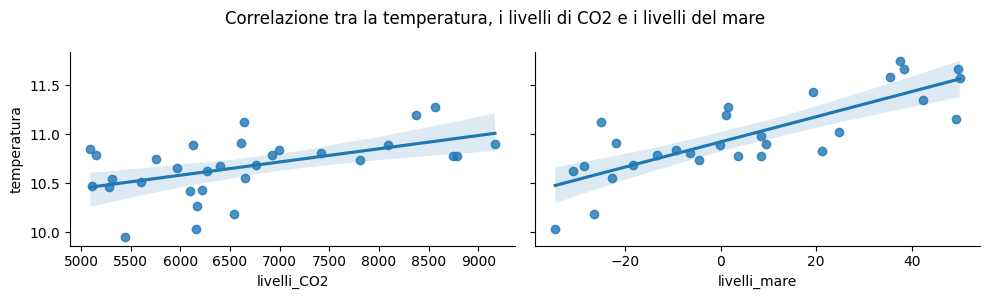

In [19]:
# Calcolo la temperatura media globale per ogni anno
df_temp_media = get_df_temp_media_globale_per_anno()
# df_temp_media = df_temp_media[(df_temp_media.index == 1993) | (df_temp_media.index == 2009)]

# Unisco i tre dataframe e cambio i nomi delle colonne
df_correlazione = df_temp_media.merge(df_co2, how="outer", left_index=True, right_index=True).merge(df_sea,how="outer", left_index=True, right_index=True)
df_correlazione = df_correlazione.rename(columns={"temp_media":"temperatura", "gmsl_variation":"livelli_mare", "co2_level":"livelli_CO2" })
# df_correlazione["year"] = df_correlazione.index
# display(df_correlazione)

# Disegno i grafici
map_correlazione = sns.PairGrid(df_correlazione, y_vars=["temperatura"],  x_vars=[ "livelli_CO2", "livelli_mare"])
map_correlazione.fig.set_size_inches(10, 3)
map_correlazione.map(sns.regplot)#, color=sns.color_palette()[1])
map_correlazione.fig.suptitle('Correlazione tra la temperatura, i livelli di CO2 e i livelli del mare', fontsize=12)
plt.tight_layout()
plt.show()

Stampiamo ora anche la matrice di correlazione: 

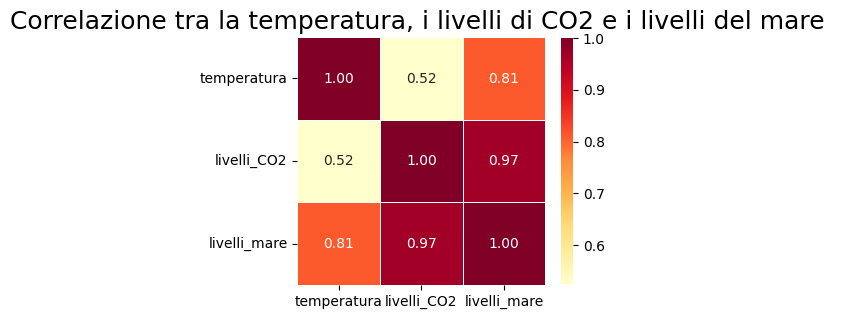

In [20]:
# Calcolo la correlazione...
df_corr =  df_correlazione.corr()

# ... e ne disegno la matrice
plt.figure(figsize=(4,4))
sns.heatmap(df_corr, square=True, fmt='.2f', linewidths=.5, cmap="YlOrRd", annot=True, cbar_kws={"shrink": 0.8})
plt.yticks(rotation=0)
plt.title("Correlazione tra la temperatura, i livelli di CO2 e i livelli del mare ", fontsize=18)
plt.show()

Si può quindi notare che ci sono:
- una moderata correlazione lineare (positiva) tra la temperatura e le emisioni di CO2;
- una forte correlazione lineare (positiva) tra la temperatura e i livelli del mare e tra i livelli del mare e le emissioni di CO2

## 5. Perchè è importante fermare i cambiamenti climatici?
Andiamo ora ad analizzare i possibili andamenti futuri delle temperature e dei livelli del mare. 

In [21]:
def predict_df_futuro(df_presente):
    # Salvo i valori gia' presenti
    nome_colonna = df_presente.columns[0]
    valori_presenti = np.array(df_presente[nome_colonna])
    years_presenti =  np.array(df_presente.index)

    # Calcolo i valori futuri
    years_futuri = np.arange(2022, 2100, 10) # numpy.ndarray con futuri anni
    line = linear_model.LinearRegression()
    line.fit(years_presenti.reshape(-1,1), valori_presenti)
    valori_futuri = line.predict(years_futuri.reshape(-1,1))   # numpy.ndarray con futuri valori

    # Calcolo e ritorno il dataframe
    df_futuro = pd.DataFrame({nome_colonna: valori_futuri, 'year': list(years_futuri)}, columns=[nome_colonna, 'year'])
    df_futuro = df_futuro.set_index('year')
    return df_futuro

### Temperature

year,2022,2032,2042,2052,2062,2072,2082,2092
temp_media,11.430696,11.699951,11.969206,12.238461,12.507716,12.776971,13.046226,13.315481


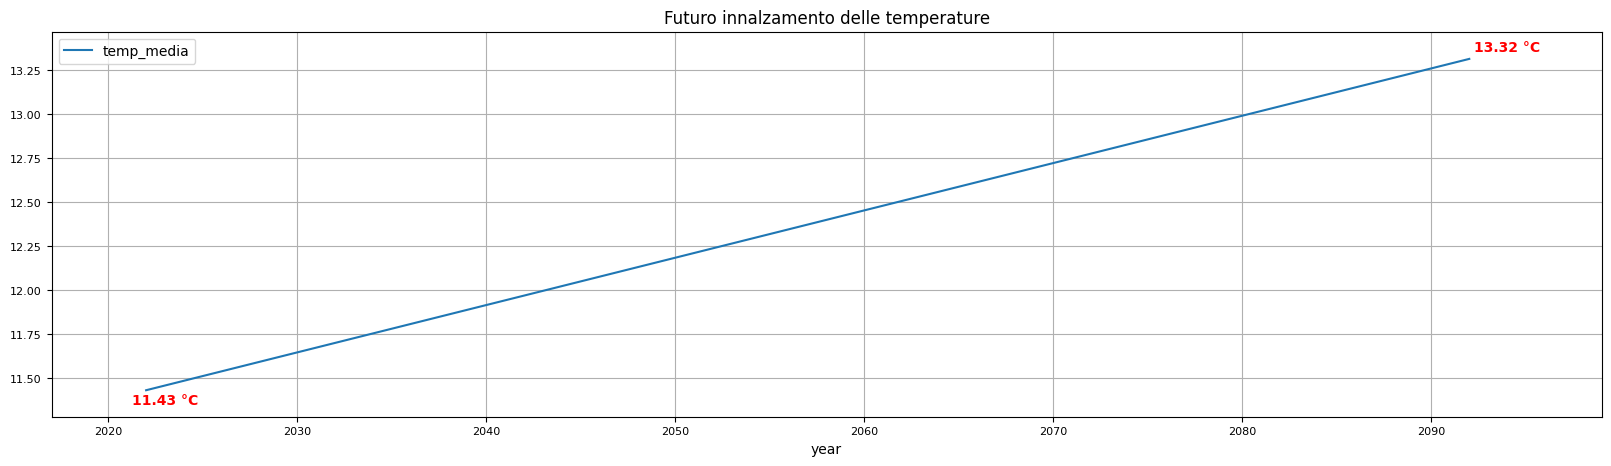

In [22]:
# Calcolo e stampo un Dataframe per l'andamento futuro delle temperature
df_temp_media = get_df_temp_media_globale_per_anno()
df_futuro = predict_df_futuro(df_temp_media)
min_year, min_year, max_year, max_value = get_min_max_years_values(df_temp_media)
# df_futuro = pd.concat([df_futuro, df_temp_media.iloc[[0, -1]]]).sort_index()
display(df_futuro.transpose())

# Disegno il grafico
titolo = "Futuro innalzamento delle temperature"
min_year, min_value, max_year, max_value = get_min_max_years_values(df_futuro)
df_futuro.plot(fontsize=8, figsize=(20,5), title=titolo, xlim=(min_year-5, max_year+7), ylim=(min_value-0.15, max_value+0.15))
print_tag_in_grafico(min_year+1, min_value-0.08, str(min_value)+" °C")
print_tag_in_grafico(max_year+2, max_value+0.04,str(max_value)+" °C")
plt.grid(True)

### Livelli del mare

year,2022,2032,2042,2052,2062,2072,2082,2092
gmsl_variation,52.259437,83.456731,114.654025,145.851319,177.048612,208.245906,239.4432,270.640494


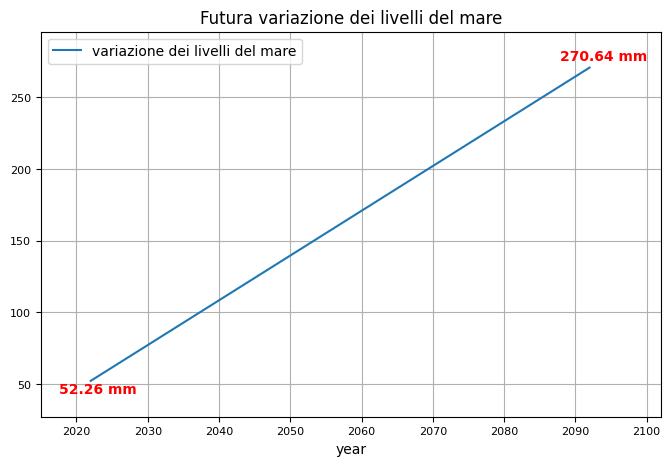

In [23]:
# Calcolo e stampo un Dataframe per l'andamento futuro dei livelli del mare
df_futuro = predict_df_futuro(df_sea)
display(df_futuro.transpose())

# Disegno il grafico
titolo = "Futura variazione dei livelli del mare"
min_year, min_value, max_year, max_value = get_min_max_years_values(df_futuro)
df_futuro.plot(fontsize=8, figsize=(8,5), title=titolo, xlim=(min_year-7, max_year+10), ylim=(min_value-25, max_value+25))
print_tag_in_grafico(min_year+1, min_value-9, str(min_value)+" mm")
print_tag_in_grafico(max_year+2, max_value+5,str(max_value)+" mm")
plt.grid(True)
plt.legend(loc='upper left').get_texts()[0].set_text("variazione dei livelli del mare")

## 6. Conclusioni
I cambiamenti climatici sono un gravissimo problema che bisogna fermare per non aggravare ulteriormente la situazione ambientale. Come mostrato, infatti, ignorare i cambiamenti climatici porterebbe a significativi aumenti della temperatura e dei livelli del mare. <br>L'aumento della CO2 è una delle cause principali dei cambiamenti climatici. Ognuno di noi può quindi contribuire a limitarne le emissioni, ad esempio risparmiando energia in casa, usando i trasporti pubblici e mangiando meno carne. <br>